# DATAPOOL Final Project

## NAME : SHOURJA DUTTA
## ROLL NO. : 2228061

## Key Performance Indicators (KPIs)

### Measure the total sales generated by each store to identify the top-performing locations

In [1]:
import pandas as pd

file_path = 'Retail and wherehouse Sale.csv'  
data = pd.read_csv(file_path)

data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

store_sales = data.groupby('SUPPLIER')['TOTAL SALES'].sum().reset_index()

top_performing_stores = store_sales.sort_values(by='TOTAL SALES', ascending=False)

print(top_performing_stores.head())

                    SUPPLIER  TOTAL SALES
52             CROWN IMPORTS    192434.62
8         ANHEUSER BUSCH INC    147630.16
151   MILLER BREWING COMPANY    133017.58
104             HEINEKEN USA     97868.70
26   BOSTON BEER CORPORATION     39069.03


### Calculate the percentage change in sales over time to assess growth trends across stores and departments.

In [3]:
data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

grouped_data = data.groupby(['SUPPLIER', 'ITEM TYPE', 'YEAR', 'MONTH'])['TOTAL SALES'].sum().reset_index()

grouped_data = grouped_data.sort_values(by=['SUPPLIER', 'ITEM TYPE', 'YEAR', 'MONTH'])

grouped_data['PERCENTAGE CHANGE'] = grouped_data.groupby(['SUPPLIER', 'ITEM TYPE'])['TOTAL SALES'].pct_change() * 100

print(grouped_data)

                        SUPPLIER    ITEM TYPE  YEAR  MONTH  TOTAL SALES  \
0           A I G WINE & SPIRITS         WINE  2020      1         6.00   
1           A I G WINE & SPIRITS         WINE  2020      3        15.00   
2           A I G WINE & SPIRITS         WINE  2020      7         5.00   
3            ADAMBA IMPORTS INTL       LIQUOR  2020      1         3.86   
4            ADAMBA IMPORTS INTL       LIQUOR  2020      7         3.21   
...                          ...          ...   ...    ...          ...   
1297           YUENGLING BREWERY         KEGS  2020      7       126.00   
1298  Z WINE GALLERY IMPORTS LLC         WINE  2020      7         0.98   
1299                  ZURENA LLC  NON-ALCOHOL  2020      1         4.42   
1300                  ZURENA LLC  NON-ALCOHOL  2020      3         0.08   
1301                  ZURENA LLC  NON-ALCOHOL  2020      7         0.00   

      PERCENTAGE CHANGE  
0                   NaN  
1            150.000000  
2            -66.6666

### Determine the average sales per week for each department, helping to identify consistent performers

In [4]:
data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

data.set_index('DATE', inplace=True)

weekly_sales = data.groupby('ITEM TYPE').resample('W')['TOTAL SALES'].sum().reset_index()

avg_weekly_sales = weekly_sales.groupby('ITEM TYPE')['TOTAL SALES'].mean().reset_index()

avg_weekly_sales.rename(columns={'TOTAL SALES': 'AVERAGE WEEKLY SALES'}, inplace=True)

print(avg_weekly_sales)

      ITEM TYPE  AVERAGE WEEKLY SALES
0          BEER          21022.734444
1       DUNNAGE           -336.527778
2          KEGS            233.333333
3        LIQUOR           2514.993056
4   NON-ALCOHOL            257.306667
5           REF            -47.508519
6  STR_SUPPLIES              9.600000
7          WINE           4976.354722


### How do the total sales of each department (item type) vary over time, and which department has the most consistent sales performance across months?

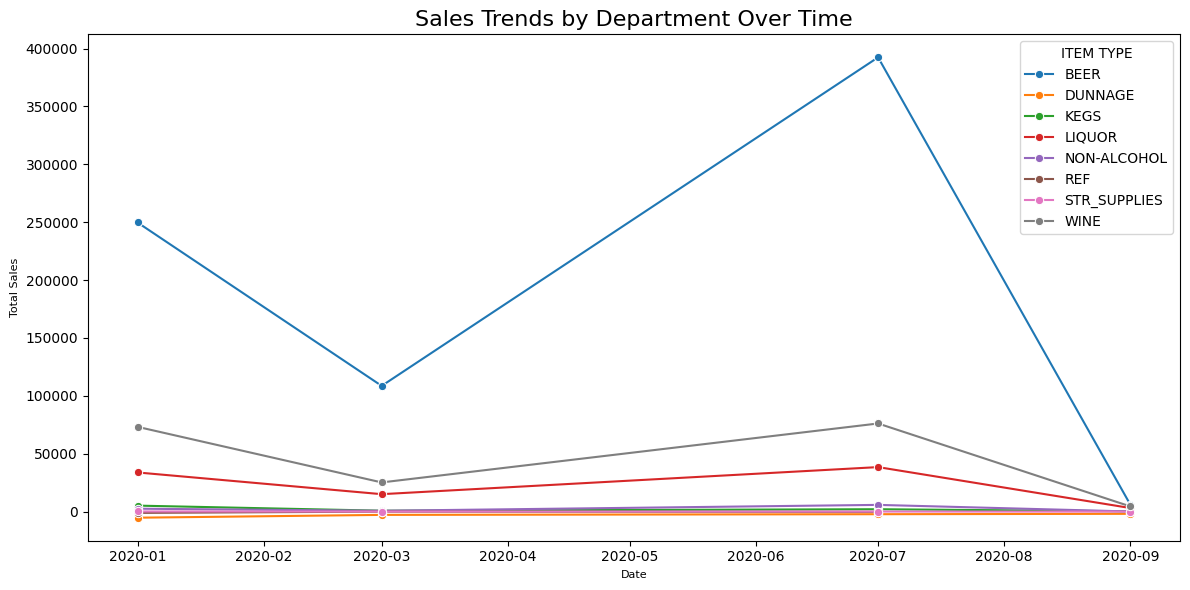

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Retail and wherehouse Sale.csv'
data = pd.read_csv(file_path)

data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

grouped_sales = data.groupby(['ITEM TYPE', 'DATE'])['TOTAL SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='DATE', y='TOTAL SALES', hue='ITEM TYPE', data=grouped_sales, marker='o')

plt.title('Sales Trends by Department Over Time', fontsize=16)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Total Sales', fontsize=8)

plt.tight_layout()
plt.show()

### Evaluate how sales fluctuate during different seasons and holidays to plan for peak demand periods. 

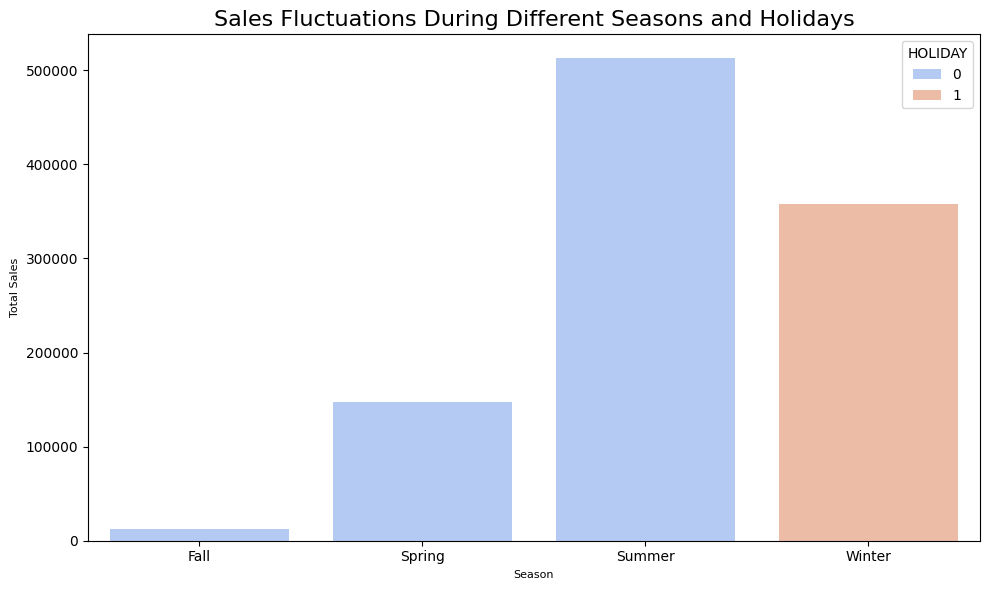

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Retail and wherehouse Sale.csv'
data = pd.read_csv(file_path)

data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['SEASON'] = data['DATE'].dt.month.apply(get_season)

def is_holiday(date):
    holidays = ['2020-01-01', '2020-12-25', '2020-11-26', '2021-01-01'] 
    return 1 if date.strftime('%Y-%m-%d') in holidays else 0

data['HOLIDAY'] = data['DATE'].apply(is_holiday)

seasonal_sales = data.groupby(['SEASON', 'HOLIDAY'])['TOTAL SALES'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='SEASON', y='TOTAL SALES', hue='HOLIDAY', data=seasonal_sales, palette='coolwarm')

plt.title('Sales Fluctuations During Different Seasons and Holidays', fontsize=16)
plt.xlabel('Season', fontsize=8)
plt.ylabel('Total Sales', fontsize=8)

plt.tight_layout()
plt.show()


## Business Questions to address

### Which stores have the highest and lowest sales over the analyzed period?

In [3]:
import pandas as pd

file_path = 'Retail and wherehouse Sale.csv'
data = pd.read_csv(file_path)

data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

store_sales = data.groupby('SUPPLIER')['TOTAL SALES'].sum().reset_index()

highest_sales_store = store_sales.loc[store_sales['TOTAL SALES'].idxmax()]

lowest_sales_store = store_sales.loc[store_sales['TOTAL SALES'].idxmin()]

print("Store with Highest Sales:")
print(highest_sales_store)

print("\nStore with Lowest Sales:")
print(lowest_sales_store)

Store with Highest Sales:
SUPPLIER       CROWN IMPORTS
TOTAL SALES        192434.62
Name: 52, dtype: object

Store with Lowest Sales:
SUPPLIER       PREMIUM DISTRIBUTORS INC
TOTAL SALES                     -9620.0
Name: 183, dtype: object


### What are the sales trends across different product categories and departments

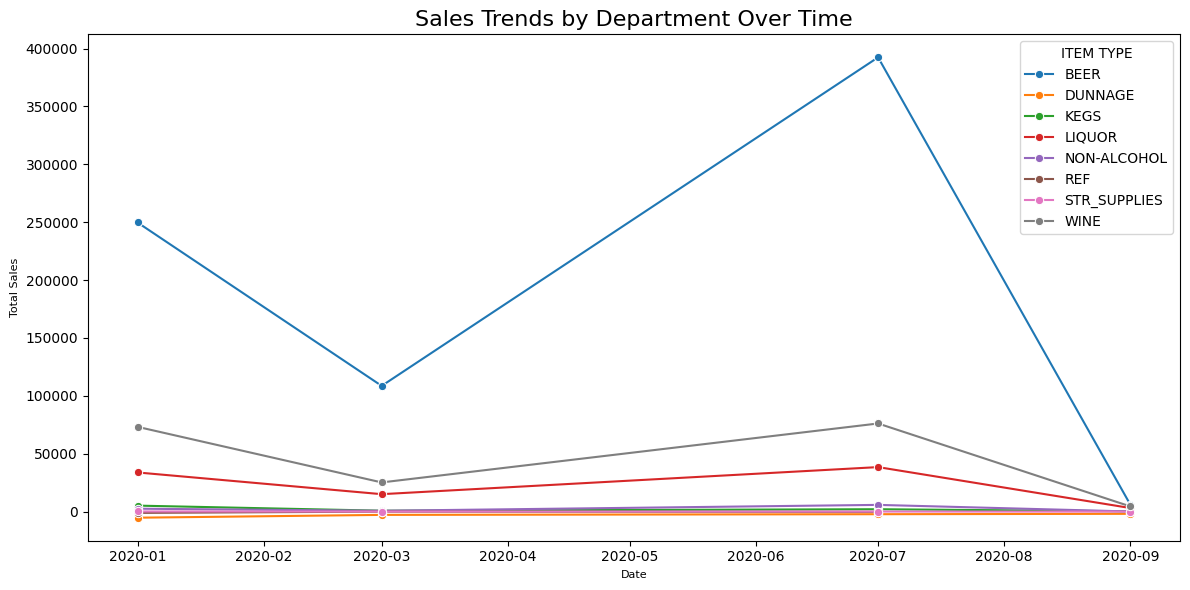

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Retail and wherehouse Sale.csv'
data = pd.read_csv(file_path)

data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

department_sales = data.groupby(['ITEM TYPE', 'DATE'])['TOTAL SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='DATE', y='TOTAL SALES', hue='ITEM TYPE', data=department_sales, marker='o')

plt.title('Sales Trends by Department Over Time', fontsize=16)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Total Sales', fontsize=8)

plt.tight_layout()
plt.show()

### Which day of the week consistently has the highest and lowest total sales across all stores?

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17060\3422086164.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DAY OF WEEK', y='TOTAL SALES', data=day_sales, palette='coolwarm')


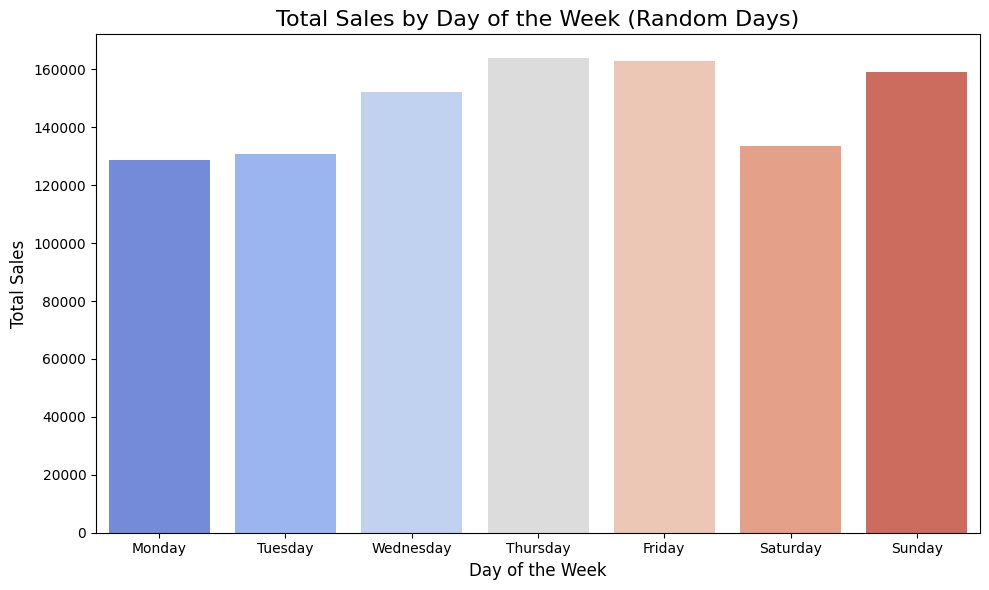

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

file_path = 'Retail and wherehouse Sale.csv'
data = pd.read_csv(file_path)

data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

data['RANDOM DAY'] = [random.randint(1, 28) for _ in range(len(data))]

data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=data['RANDOM DAY']))

data['DAY OF WEEK'] = data['DATE'].dt.day_name()

day_sales = data.groupby('DAY OF WEEK')['TOTAL SALES'].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['DAY OF WEEK'] = pd.Categorical(day_sales['DAY OF WEEK'], categories=day_order, ordered=True)

day_sales = day_sales.sort_values('DAY OF WEEK')

plt.figure(figsize=(10, 6))

sns.barplot(x='DAY OF WEEK', y='TOTAL SALES', data=day_sales, palette='coolwarm')

plt.title('Total Sales by Day of the Week (Random Days)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_17060\2463878285.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEASON/HOLIDAY', y='TOTAL SALES', data=seasonal_sales, palette='coolwarm')


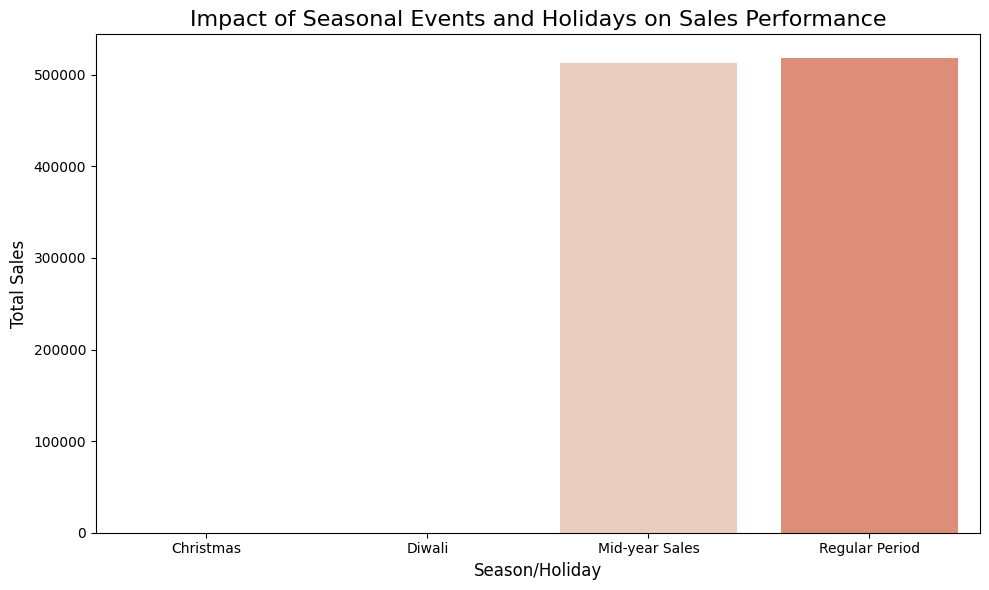

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'Retail and wherehouse Sale.csv'  # Update with the correct path
data = pd.read_csv(file_path)

# Calculate the total sales (retail + warehouse) for each record
data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

# Create a 'DATE' column using YEAR and MONTH (assuming DAY=1 for simplicity)
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

# Define seasonal events and holidays (for simplicity, we assume certain months represent holidays)
def categorize_season_holiday(row):
    if row['MONTH'] in [12]:  # December for Christmas/New Year
        return 'Christmas'
    elif row['MONTH'] in [10, 11]:  # October/November for Diwali
        return 'Diwali'
    elif row['MONTH'] == 7:  # July for mid-year sales
        return 'Mid-year Sales'
    else:
        return 'Regular Period'

# Create a new column 'SEASON/HOLIDAY' based on the function
data['SEASON/HOLIDAY'] = data.apply(categorize_season_holiday, axis=1)

# Group by 'SEASON/HOLIDAY' and sum the total sales
seasonal_sales = data.groupby('SEASON/HOLIDAY')['TOTAL SALES'].sum().reset_index()

# Plotting Sales During Seasonal Events and Regular Periods
plt.figure(figsize=(10, 6))

# Create a bar plot to show total sales during holiday/seasonal vs regular periods
sns.barplot(x='SEASON/HOLIDAY', y='TOTAL SALES', data=seasonal_sales, palette='coolwarm')

# Add titles and labels
plt.title('Impact of Seasonal Events and Holidays on Sales Performance', fontsize=16)
plt.xlabel('Season/Holiday', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### What is the trend of warehouse sales over the months, and how do they compare to retail sales in the same period?

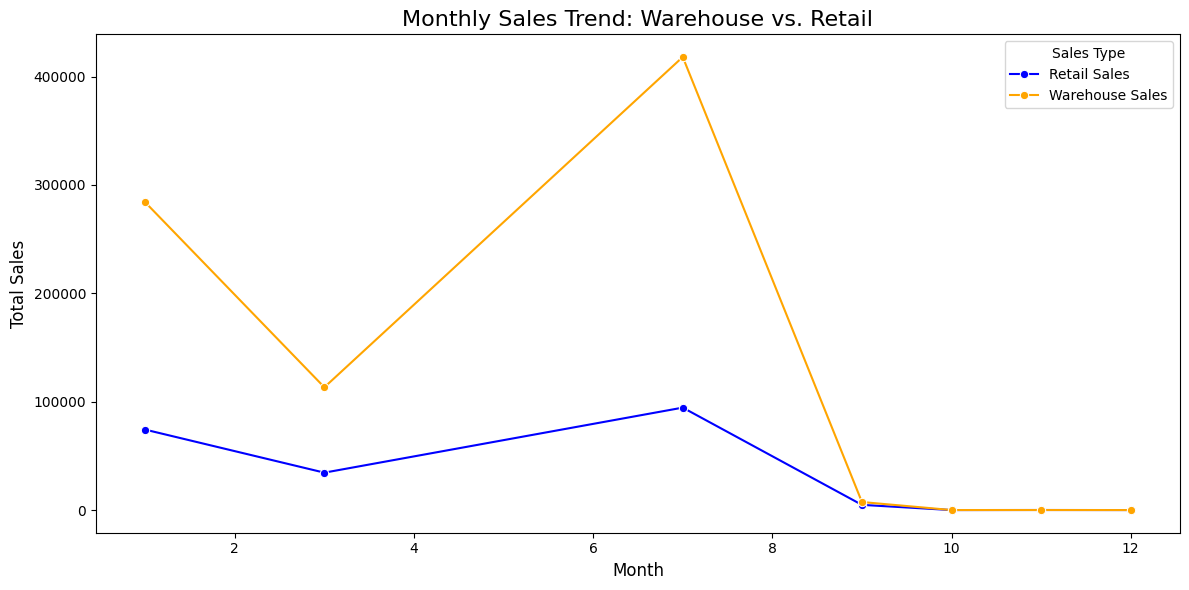

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Retail and wherehouse Sale.csv'
data = pd.read_csv(file_path)

data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']

data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

monthly_sales = data.groupby(['MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()
 
plt.figure(figsize=(12, 6))

sns.lineplot(x='MONTH', y='RETAIL SALES', data=monthly_sales, marker='o', label='Retail Sales', color='blue')
sns.lineplot(x='MONTH', y='WAREHOUSE SALES', data=monthly_sales, marker='o', label='Warehouse Sales', color='orange')

plt.title('Monthly Sales Trend: Warehouse vs. Retail', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.legend(title='Sales Type')

plt.tight_layout()
plt.show()
